# Regressão linear

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

Esta aula segue o Capítulo 3 do livro "An Introduction to Statistical Learning" de James, Witten, Tibshirani e Friedman.

### 1.1 Regressão Linear Simples

Primeiro, vamos carregar o conjunto de dados de Publicidade (Advertising.csv). Ele contém informações sobre as vendas de *displays* (em milhares de unidades) de um produto específico e uma lista de orçamentos de publicidade (em milhares de dólares) para TV, rádio e jornais.

Abrimos o conjunto de dados usando a biblioteca *pandas* para manipulação de conjuntos de dados e análise de dados em Python.


**Bibliotecas necessárias**

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
import statsmodels.api as sm

**Carregando dados**

In [62]:
advertising = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Advertising.csv', usecols=[1,2,3,4])

**Visualizando os dados**

In [63]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Vejamos as **Informações gerais** sobre o conjunto de dados

In [64]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Podemos ter mais informações sobre as variáveis ​​individuais usando a função `describe`.

In [66]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Acessando colunas específicas**

Se você quiser apenas chamar uma variável em pandas, você tem 3 opções:

1. use colchetes como se a variável fosse um componente de um dicionário
2. use ou subscritos pontuais como se a variável fosse uma função dos dados
3. use a função `loc` 

In [67]:
advertising['TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [68]:
advertising.TV

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [69]:
advertising.loc[:, 'TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

Observe que a função `loc` é mais interessante e geralmente é usada para subconjuntos de linhas e colunas.

In [70]:
# Select multiple columns and subset of rows
advertising.loc[0:5,['Sales','TV']]

,Sales,TV
0,22.1,230.1
1,10.4,44.5
2,9.3,17.2
3,18.5,151.5
4,12.9,180.8
5,7.2,8.7


Suponhamos que estamos interessados ​​na relação (linear) entre vendas e propaganda na TV.

$$ \text{Sales} \approx \beta_0 + \beta_1 \times \text{TV} $$

Como as duas variáveis ​​estão relacionadas? Inspeção visual: gráfico de dispersão.

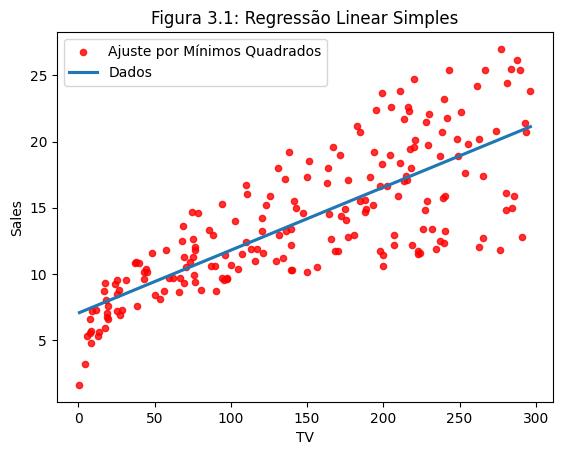

In [76]:
sns.regplot(x=advertising.TV, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':20})
plt.title('Figura 3.1: Regressão Linear Simples')
plt.legend(['Ajuste por Mínimos Quadrados', 'Dados'])
plt.show()

### Estimando os Coeficientes

Como estimamos a melhor linha de ajuste? Minimize a Soma dos Quadrados Residuais (SQR).

Primeiro, suponha que temos um conjunto de dados $D=x_{i}, y_{i}$, onde $x$ é a variável independente (TV) e $y$ é a variável dependente (Sales). $i=1, \ldots, N$ é o número de observações. 

Definimos a previsão de $y$ baseado em $X$ como:

$$ \hat{y}_i = \hat{\beta} X_i $$

Os resíduos são os componentes não explicados do modelo, ou seja, a diferença entre o valor observado e o valor previsto:

$$ e_i = y_i - \hat{y}_i $$

Nossa função objetivo (a ser minimizada) é a Soma dos Quadrados dos Resíduos (RSS):


$$ RSS := \sum_{i=1}^{N} e_i^2 $$

RSS: Resíduo Quadrático Total (Residual Sum of Squares), e ":=" é um símbolo de definição.

E o coeficiente MQO é definido como seu minimizador:

$$ \hat{\beta}_{OLS} = \arg\min_{\beta} \sum_{i=1}^{N} e_i^2  = \arg\min_{\beta} \sum_{i=1}^{N} (y_i - \beta X_i)^2 $$

Vamos usar a biblioteca  `sklearn` para ajustar um modelo de regressão linear de vendas em propaganda de TV. (OBS: `scikit-learn` não existe o método *summary()*).

In [84]:
# Define X e y
X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales.values

reg = LinearRegression().fit(X, y)

In [85]:
print(f"Intercepto: {reg.intercept_}")
print(f"Coeficiente: {reg.coef_[0]}")

Intercepto: 7.032593549127695
Coeficiente: 0.04753664043301975


OBS: `.values.reshape(-1,1)` transforma a variável para o formato que o scikit-learn exige: uma matriz 2D (n observações, 1 variável).

In [87]:
reg2 = LinearRegression().fit(advertising[['TV']], advertising[['Sales']])
print(f"Intercepto: {reg2.intercept_}")
print(f"Coeficiente: {reg2.coef_[0]}")

Intercepto: [7.03259355]
Coeficiente: [0.04753664]


**Visualizando os Resíduos**

Podemos visualizar os resíduos como as distâncias verticais entre os dados e a linha de previsão. A função objetivo RSS é a soma dos quadrados dos comprimentos das linhas verticais.

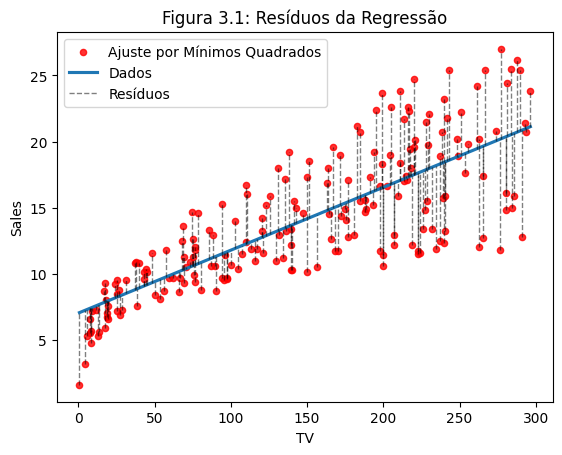

In [88]:
y_hat = reg.predict(X)

sns.regplot(x=advertising.TV, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':20})
plt.vlines(X, np.minimum(y, y_hat), np.maximum(y, y_hat), linestyle='--', color='k', alpha=0.5, linewidth=1)
plt.title('Figura 3.1: Resíduos da Regressão')
plt.legend(['Ajuste por Mínimos Quadrados', 'Dados', 'Resíduos'])
plt.show()

**Solução Analítica com Álgebra Linear**

A solução de forma fechada na álgebra matricial é dada por:


$$\hat{\beta}_{OLS} = (X'X)^{-1}(X'y)$$

Python possui uma série de atalhos para tornar a sintaxe menos prolixa. No entanto, ainda precisamos importar a invfunção de numpy. 


In [89]:
# Compute OLS coefficient with matrix algebra
beta = inv(X.T @ X) @ X.T @ y

print(beta)

[0.08324961]


Por que o resultado é diferente?

Falta-nos um coeficiente: o intercepto. A nossa regressão agora parece-se com isto

In [90]:
# Com intercepto
one = np.ones(np.shape(X))
X1 = np.concatenate([one, X], axis=1)

beta_OLS = inv(X1.T @ X1) @ X1.T @ y
print(f"Coeficientes OLS (com intercepto): {beta_OLS}")


Coeficientes OLS (com intercepto): [7.03259355 0.04753664]


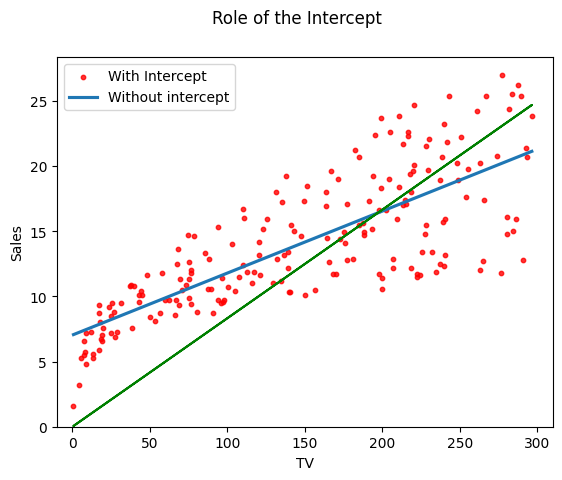

In [92]:
fig, ax = plt.subplots(1,1)
fig.suptitle('Role of the Intercept')

sns.regplot(x=advertising.TV, y=advertising.Sales, ax=ax, order=1, ci=None, scatter_kws={'color':'r', 's':10})
ax.plot(X, beta*X, color='g')
plt.xlim(-10,310); plt.ylim(ymin=0);
ax.legend(['With Intercept', 'Without intercept'])

Como inserimos uma interceptação usando álgebra matricial? Adicionamos uma coluna de unidades.

$$ X_{1} = [1, X] = \begin{pmatrix} 1 & x_{1} \\ 1 & x_{2} \\ \vdots & \vdots \\ 1 & x_{N} \end{pmatrix} $$

Agora obtivemos de fato os mesmos coeficientes exatos.

O que significa minimizar a Soma dos Quadrados Residuais na prática? Como é a função objetivo?

In [93]:
from sklearn.preprocessing import scale

# First, scale the data
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales
regr = LinearRegression().fit(X,y)

# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

In [94]:
# Figure 3.2 - Regression coefficients - RSS
def make_fig_3_2():
    fig = plt.figure(figsize=(15,6))
    fig.suptitle('RSS - Regression coefficients')

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
    ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
    ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
    ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
                alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
    ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
    ax2.set_zlabel('RSS')
    ax2.set_zlim(Z.min(),Z.max())
    ax2.set_ylim(0.02,0.07)

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$\beta_0$')
        ax.set_ylabel(r'$\beta_1$')
        ax.set_yticks([0.03,0.04,0.05,0.06])
        ax.legend()

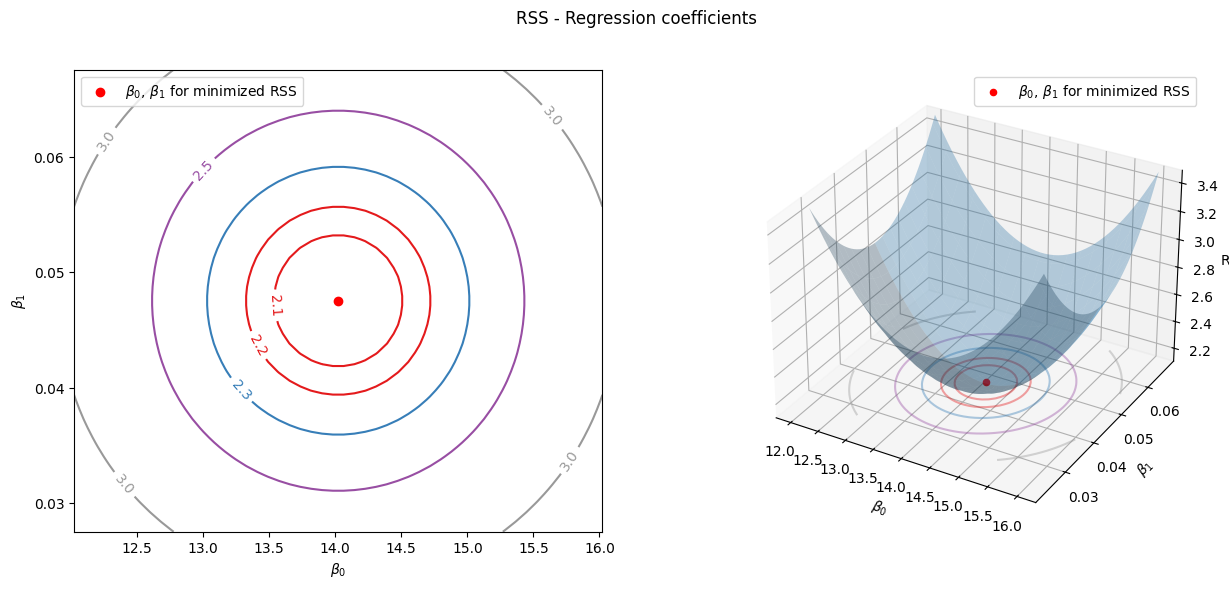

In [95]:
make_fig_3_2()

### Avaliando a precisão das estimativas dos coeficientes

Qual é a precisão do nosso ajuste de regressão? Suponha que estivéssemos extraindo amostras diferentes (pequenas) do mesmo processo de geração de dados, por exemplo

$$ y_i = 2 + 3 x_i + \epsilon_i $$

onde $x_i ~ \mathcal{N}(0, 1)$ e $\epsilon_i \sim \mathcal{N}(0, 3)$. 

In [96]:
# Init
N = 30;    # Sample size
K = 100;   # Number of simulations
beta_hat = np.zeros((2,K))
x = np.linspace(-4,4,N)

# Set seed
np.random.seed(1)

# K simulations
for i in range(K):
    # Simulate data
    x1 = np.random.normal(0,1,N).reshape([-1,1])
    X = np.concatenate([np.ones(np.shape(x1)), x1], axis=1)
    epsilon = np.random.normal(0,5,N)
    beta0 = [2,3]
    y = X @ beta0 + epsilon

    # Estimate coefficients
    beta_hat[:,i] = inv(X.T @ X) @ X.T @ y

In [97]:
# new figure 2
def make_new_fig_2():

    # Init figure
    fig, ax = plt.subplots(1,1)
    
    for i in range(K):
        # Plot line
        ax.plot(x, beta_hat[0,i] + x*beta_hat[1,i], color='blue', alpha=0.2, linewidth=1)
        if i==K-1:
            ax.plot(x, beta_hat[0,i] + x*beta_hat[1,i], color='blue', alpha=0.2, linewidth=1, label='Estimated Lines')

    # Plot true line
    ax.plot(x, 2 + 3*x, color='red', linewidth=3, label='True Line');
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.legend();
    ax.set_xlim(-4,4);

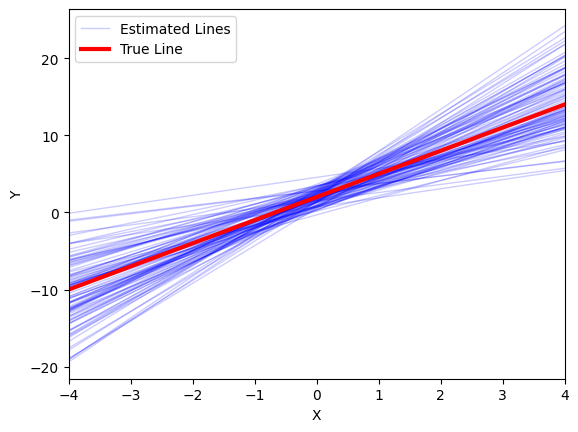

In [98]:
make_new_fig_2()

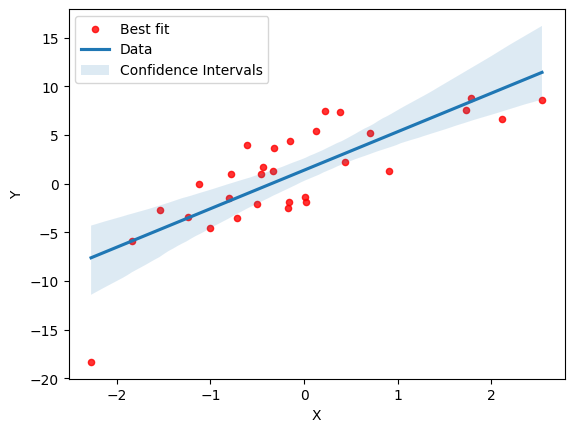

In [99]:
fig, ax = plt.subplots(1,1)

# Plot last simulation scatterplot with confidence interval
sns.regplot(x=x1, y=y, ax=ax, order=1, scatter_kws={'color':'r', 's':20});
ax.set_xlabel('X'); ax.set_ylabel('Y'); 
ax.legend(['Best fit','Data', 'Confidence Intervals']);

Como podemos ver, dependendo da amostra, obtemos uma estimativa diferente da relação linear entre
e
. No entanto, essas estimativas estão, em média, corretas. De fato, podemos visualizar sua distribuição.

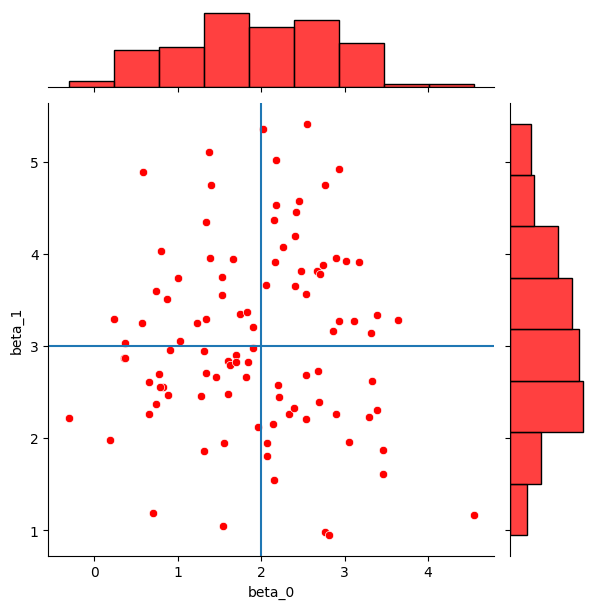

In [100]:
# Plot distribution of coefficients
plot = sns.jointplot(x=beta_hat[0,:], y=beta_hat[1,:], color='red', edgecolor="white");
plot.ax_joint.axvline(x=2);
plot.ax_joint.axhline(y=3);
plot.set_axis_labels('beta_0', 'beta_1');

Como calculamos intervalos de confiança manualmente?

$$Var(\hat{\beta}) = \sigma^2 (X'X)^{-1}$$

onde $\sigma^2 = var(\epsilon)$ é a variância do erro. Como não sabemos $\sigma^2$, estimamos isso como Var($\hat{\epsilon}$).

$$ \hat{Var}(\hat{\beta}) = \hat{\sigma}^2 (X'X)^{-1} $$

Se assumirmos que os erros padrão são distribuídos normalmente (ou aplicarmos o Teorema do Limite Central, assumindo $n \to \infty$), um intervalo de confiança de 95% para o coeficiente MQO assume a forma

$$ CI = \hat{\beta}_{OLS} -1.96 \times SE(\hat{\beta}_{OLS}) ; \hat{\beta}_{OLS} + 1.96 \times SE(\hat{\beta}_{OLS}) $$

onde $SE(\hat{\beta}_{OLS}) = \sqrt{Var(\hat{\beta})}$ é o erro padrão do coeficiente MQO.

In [101]:
# Import again X and y from example above
X = advertising.TV.values.reshape(-1,1)
X1 = np.concatenate([np.ones(np.shape(X)), X], axis=1)
y = advertising.Sales.values

# Compute residual variance
X_hat = X1 @ beta_OLS
e = y - X_hat
sigma_hat = np.var(e)
var_beta_OLS = sigma_hat * inv(X1.T @ X1)

# Take elements on the diagonal and square them
std_beta_OLS = [var_beta_OLS[0,0]**.5, var_beta_OLS[1,1]**.5]

print(std_beta_OLS)

[0.4555479737400674, 0.0026771203500466564]


A biblioteca `statsmodels` nos permite produzir tabelas interessantes com estimativas de parâmetros e erros padrão.

In [102]:
# Table 3.1 & 3.2
est = sm.OLS.from_formula('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


**Avaliando a Precisão do Modelo**

Que métricas podemos usar para avaliar se o modelo é um bom modelo, em termos de captura da relação entre as variáveis?

Primeiro, podemos calcular nossa função objetivo: a Soma dos Quadrados Residuais ( RSS ). Valores mais baixos da nossa função objetivo indicam que obtivemos um ajuste melhor.

In [103]:
# RSS with regression coefficients
RSS = sum(e**2)

print(RSS)

2102.5305831313512


O problema com o **RSS** como métrica é que é difícil comparar diferentes regressões, pois sua escala depende da magnitude das variáveis.

Uma medida de ajuste que não depende da magnitude das variáveis ​​é $R^{2}$: a porcentagem da nossa variável explicativa explicada pelo modelo

$$ R^{2} = 1 - \frac{RSS}{TSS} $$

onde 

$$ TSS = \sum_{i=1}^{N} (y_i - \bar{y})^2 $$

In [105]:
# TSS
TSS = sum( (y-np.mean(y))**2 )

# R2
R2 = 1 - RSS/TSS

print(R2)

0.6118750508500708


## 2.2 Regressão Linear Múltipla

E se tivermos mais de uma variável explicativa? Spoiler: já tínhamos, mas uma era uma constante.

Vamos dar uma olhada na regressão das despesas com vendas de anúncios em rádio e TV separadamente.


***Regressão separada para Rádio e Jornal***

In [106]:
# Table 3.3 (1)
est = sm.OLS.from_formula('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [107]:
# Table 3.3 (2)
est = sm.OLS.from_formula('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


Parece que tanto o rádio quanto os jornais estão positivamente correlacionados com as vendas . Por que não estimamos uma regressão única com ambas as variáveis ​​dependentes?

**Regressão múltipla com todas as variáveis**

Suponhamos agora que enriquecemos nosso modelo anterior adicionando todas as diferentes formas de propaganda:

$$ \text{Sales} = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{Radio} + \beta_3 \text{Newspaper} + \varepsilon $$

Estimamos isso usando a biblioteca `statsmodels ols`.

In [108]:
# Table 3.4
est = sm.OLS.from_formula('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


**Explorando a Correlação**

Por que agora parece não haver relação entre Vendas e Jornal, enquanto a regressão univariada nos diz o oposto?

Vamos explorar a correlação entre essas variáveis.

In [109]:
# Table 3.5 - Correlation Matrix
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Vamos tentar inspecionar a relação visualmente. Observe que agora o melhor ajuste linear será tridimensional. Para torná-lo visualmente acessível, consideramos apenas a duração dos anúncios de TV e rádio como variáveis ​​dependentes. O melhor ajuste será um plano em vez de uma linha.

In [110]:
# Fit regression
est = sm.OLS.from_formula('Sales ~ Radio + TV', advertising).fit()
print(est.params)

Intercept    2.921100
Radio        0.187994
TV           0.045755
dtype: float64


In [111]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)
B1, B2 = np.meshgrid(Radio, TV, indexing='xy')

# Compute predicted plane
Z = np.zeros((TV.size, Radio.size))
for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(est.params[0] + B1[i,j]*est.params[1] + B2[i,j]*est.params[2])
        
# Compute residuals
e = est.predict() - advertising.Sales

In [112]:
# Figure 3.5 - Multiple Linear Regression
def make_fig_3_5():

    # Init figure
    fig = plt.figure()
    ax = axes3d.Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    fig.suptitle('Figure 3.5');


    # Plot best fit plane
    ax.plot_surface(B1, B2, Z, color='k', alpha=0.3)
    points = ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c=e, cmap="seismic", vmin=-5, vmax=5)
    plt.colorbar(points, cax=fig.add_axes([0.9, 0.1, 0.03, 0.8]))
    ax.set_xlabel('Radio'); ax.set_xlim(0,50)
    ax.set_ylabel('TV'); ax.set_ylim(bottom=0)
    ax.set_zlabel('Sales');
    ax.view_init(20, 20)

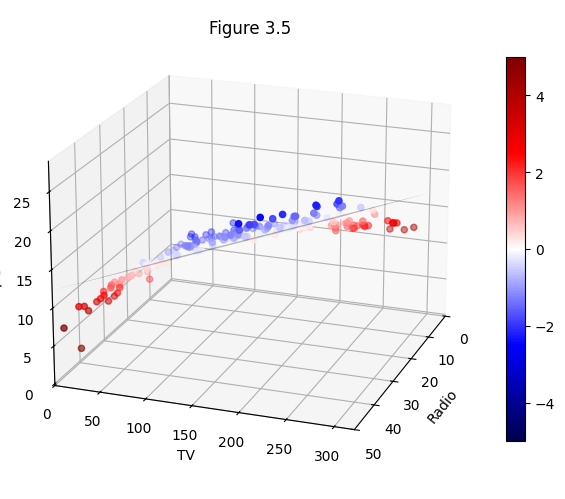

In [113]:
make_fig_3_5()

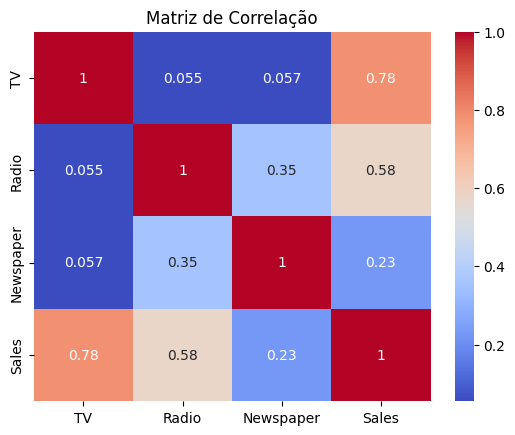

In [28]:
sns.heatmap(advertising.corr(), cmap="coolwarm", annot=True)
plt.title('Matriz de Correlação')
plt.show()

**Algumas perguntas importantes**

Como você verifica se o modelo se ajusta bem aos dados com múltiplos regressores? statmodels A maioria dos pacotes de regressão gera automaticamente mais informações sobre o modelo de mínimos quadrados.

In [114]:
# Measires of fit
est.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,859.6
Date:,"seg, 28 abr 2025",Prob (F-statistic):,4.83e-98
Time:,18:51:27,Log-Likelihood:,-386.20
No. Observations:,200,AIC:,778.4
Df Residuals:,197,BIC:,788.3
Df Model:,2,,
Covariance Type:,nonrobust,,


Primeira medida: o teste F. O teste F tenta responder à pergunta “ Existe uma relação entre a resposta e os preditores? ”

Em particular, testa a seguinte hipótese

$$ H_0: \beta_1 = \beta_2 = \beta_3 = 0 $$

$$ H_a: \text{pelo menos um } \beta_i \neq 0 $$

Este teste de hipótese é realizado através do cálculo da estatística F,

$$ F = \frac{(TSS - RSS)/p}{RSS/(n - p - 1)} $$

Vamos tentar calcular manualmente.

In [115]:
# Init
X = advertising[['Radio', 'TV']]
y = advertising.Sales
e = y - est.predict(X)
RSS = np.sum(e**2)
TSS = np.sum((y - np.mean(y))**2)
(n,p) = np.shape(X)

# Compute F
F = ((TSS - RSS)/p) / (RSS/(n-p-1))
print('F = %.4f' % F)

F = 859.6177


Uma regra prática é rejeitar $H_0$ se $F > 10$. Também podemos testar se um subconjunto específico de coeficientes é igual a zero. Nesse caso, basta substituir a Soma Total dos Quadrados (SQT) pela Soma Residual dos Quadrados sob o valor nulo.

$$ F = \frac{(RSS_0 - RSS)/p}{RSS/(n - p - 1)} $$

ou seja, realizamos a regressão sob a hipótese nula e calculamos

$$ RSS_0 = \sum_{i=1}^{N} (y_i - \bar{y})^2 $$

### 3.Outras considerações no modelo de regressão

**Preditores qualitativos**

E se algumas variáveis ​​forem qualitativas em vez de quantitativas? Vamos mudar o conjunto de dados `credit`e usá-lo.



In [116]:
# Credit ratings dataset
credit = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Credit.csv', usecols=list(range(1,12)))

Este conjunto de dados contém informações sobre classificações de crédito, ou seja, cada pessoa recebe uma Ratingpontuação com base em suas próprias características individuais.

Vamos dar uma olhada nos tipos de dados.

In [117]:
# Summary
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


Como podemos ver, algumas variáveis ​​como Gender, Studentou Marriednão são numéricas.

Podemos dar uma olhada mais de perto na aparência dessas variáveis.

In [118]:
# data
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Vamos considerar a variável Student. Em uma inspeção rápida, parece ser uma variável binária Sim/Não . Vamos verificar listando todos os seus valores.

In [119]:
# What values does the Student variable take?
credit['Student'].unique()

array(['No', 'Yes'], dtype=object)

O que acontece se você passar uma variável binária para statsmodel? Ela gera automaticamente uma variável fictícia a partir dela.

In [120]:
# Table 3.7
est = sm.OLS.from_formula('Balance ~ Student', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,480.3694,23.434,20.499,0.000,434.300,526.439
Student[T.Yes],396.4556,74.104,5.350,0.000,250.771,542.140


Se uma variável assumir mais de um valor, statsmodelgera automaticamente um dummy exclusivo para cada nível (-1).

In [121]:
# Table 3.8
est = sm.OLS.from_formula('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


**Relaxando a Suposição Aditiva**

Vimos que tanto a propaganda na TV quanto no rádio estão positivamente associadas às vendas. E se houver uma sinergia? Por exemplo, se alguém vê um anúncio na TV e no rádio, a probabilidade de comprar o produto é muito maior.

Considere o seguinte modelo

$$ Sales = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{Radio} + \beta_3 \text{TV} \times \text{Radio} + \varepsilon $$

que pode ser reescrito como

$$ Sales = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{Radio} + \beta_3 \text{TV} + \beta_4 \text{Radio} + \varepsilon $$